In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### -------------------------------------------------------------------
### 1. Carga y Exploración de Datos
### -------------------------------------------------------------------

In [ ]:



# 1.1. Cargar el Conjunto de Datos
data = pd.read_csv('dataset.csv', sep=';')

# Mostrar las primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
print(data.head())

# 1.2. Información General del Dataset
print("\nInformación general del dataset:")
print(data.info())

# 1.3. Estadísticas Descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(data.describe())

# 1.4. Verificación de Valores Faltantes
print("\nVerificación de valores faltantes:")
print(data.isnull().sum())

Primeras 5 filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5     

### -------------------------------------------------------------------
### 2. Visualización de Datos
### -------------------------------------------------------------------


Creación de boxplots para identificar valores anómalos...


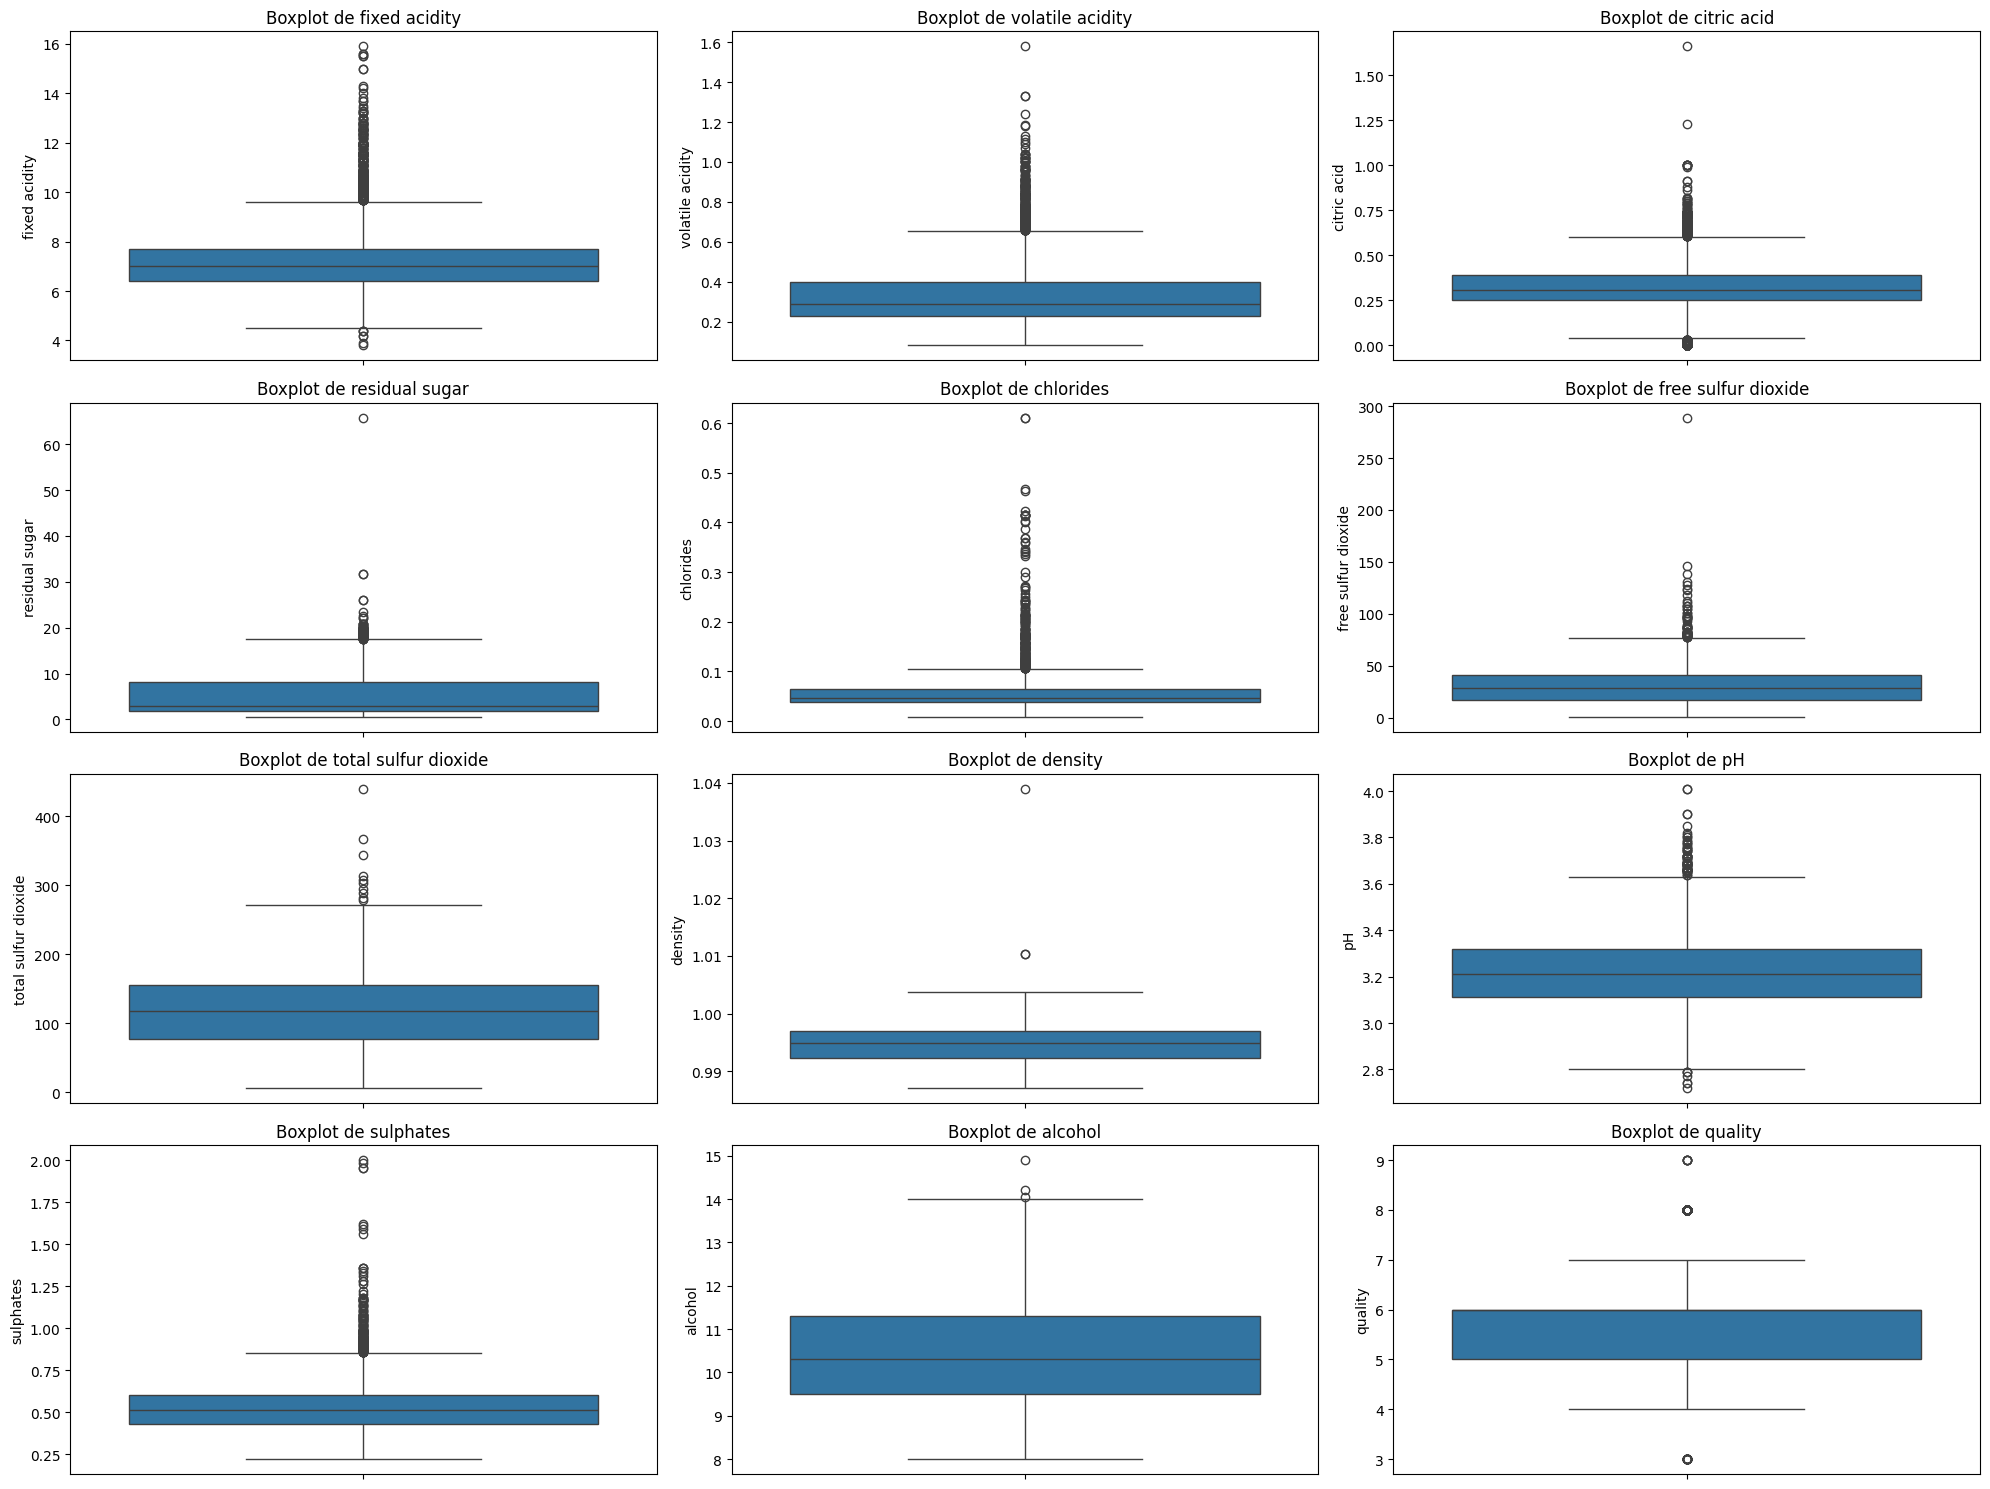

In [ ]:


# 2.1. Boxplots para Identificación de Valores Anómalos
print("\nCreación de boxplots para identificar valores anómalos...")
# Identificar columnas numéricas
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Crear boxplots para cada variable numérica
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

### -------------------------------------------------------------------
### 3. Detección de Valores Anómalos
### -------------------------------------------------------------------

In [ ]:


# 3.1. Cálculo del Rango Intercuartílico (IQR) y Identificación de Outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return lower_bound, upper_bound, outliers

# Diccionario para almacenar los límites y outliers
outlier_info = {}

print("\nDetección de valores anómalos utilizando el método IQR:")
for column in numerical_columns:
    lb, ub, outliers = detect_outliers(data, column)
    outlier_info[column] = {'lower_bound': lb, 'upper_bound': ub, 'outliers': outliers}
    print(f"\nColumna: {column}")
    print(f" - Límite Inferior: {lb}")
    print(f" - Límite Superior: {ub}")
    print(f" - Número de Outliers: {outliers.shape[0]}")

# 3.2. Documentación de Valores Anómalos Identificados
print("\nResumen de outliers por columna:")
outlier_summary = {column: info['outliers'].shape[0] for column, info in outlier_info.items()}
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Número de Outliers'])
print(outlier_summary_df)


Detección de valores anómalos utilizando el método IQR:

Columna: fixed acidity
 - Límite Inferior: 4.450000000000001
 - Límite Superior: 9.65
 - Número de Outliers: 357

Columna: volatile acidity
 - Límite Inferior: -0.024999999999999994
 - Límite Superior: 0.655
 - Número de Outliers: 377

Columna: citric acid
 - Límite Inferior: 0.03999999999999998
 - Límite Superior: 0.6000000000000001
 - Número de Outliers: 509

Columna: residual sugar
 - Límite Inferior: -7.6499999999999995
 - Límite Superior: 17.549999999999997
 - Número de Outliers: 118

Columna: chlorides
 - Límite Inferior: -0.002500000000000009
 - Límite Superior: 0.10550000000000001
 - Número de Outliers: 286

Columna: free sulfur dioxide
 - Límite Inferior: -19.0
 - Límite Superior: 77.0
 - Número de Outliers: 62

Columna: total sulfur dioxide
 - Límite Inferior: -41.5
 - Límite Superior: 274.5
 - Número de Outliers: 10

Columna: density
 - Límite Inferior: 0.9853649999999999
 - Límite Superior: 1.003965
 - Número de Outl

### -------------------------------------------------------------------
### 4. Corrección de Valores Anómalos
### -------------------------------------------------------------------



Aplicando el método IQR para corregir valores anómalos...
Corrección de valores anómalos completada.

Verificación de la corrección de valores anómalos mediante nuevos boxplots...


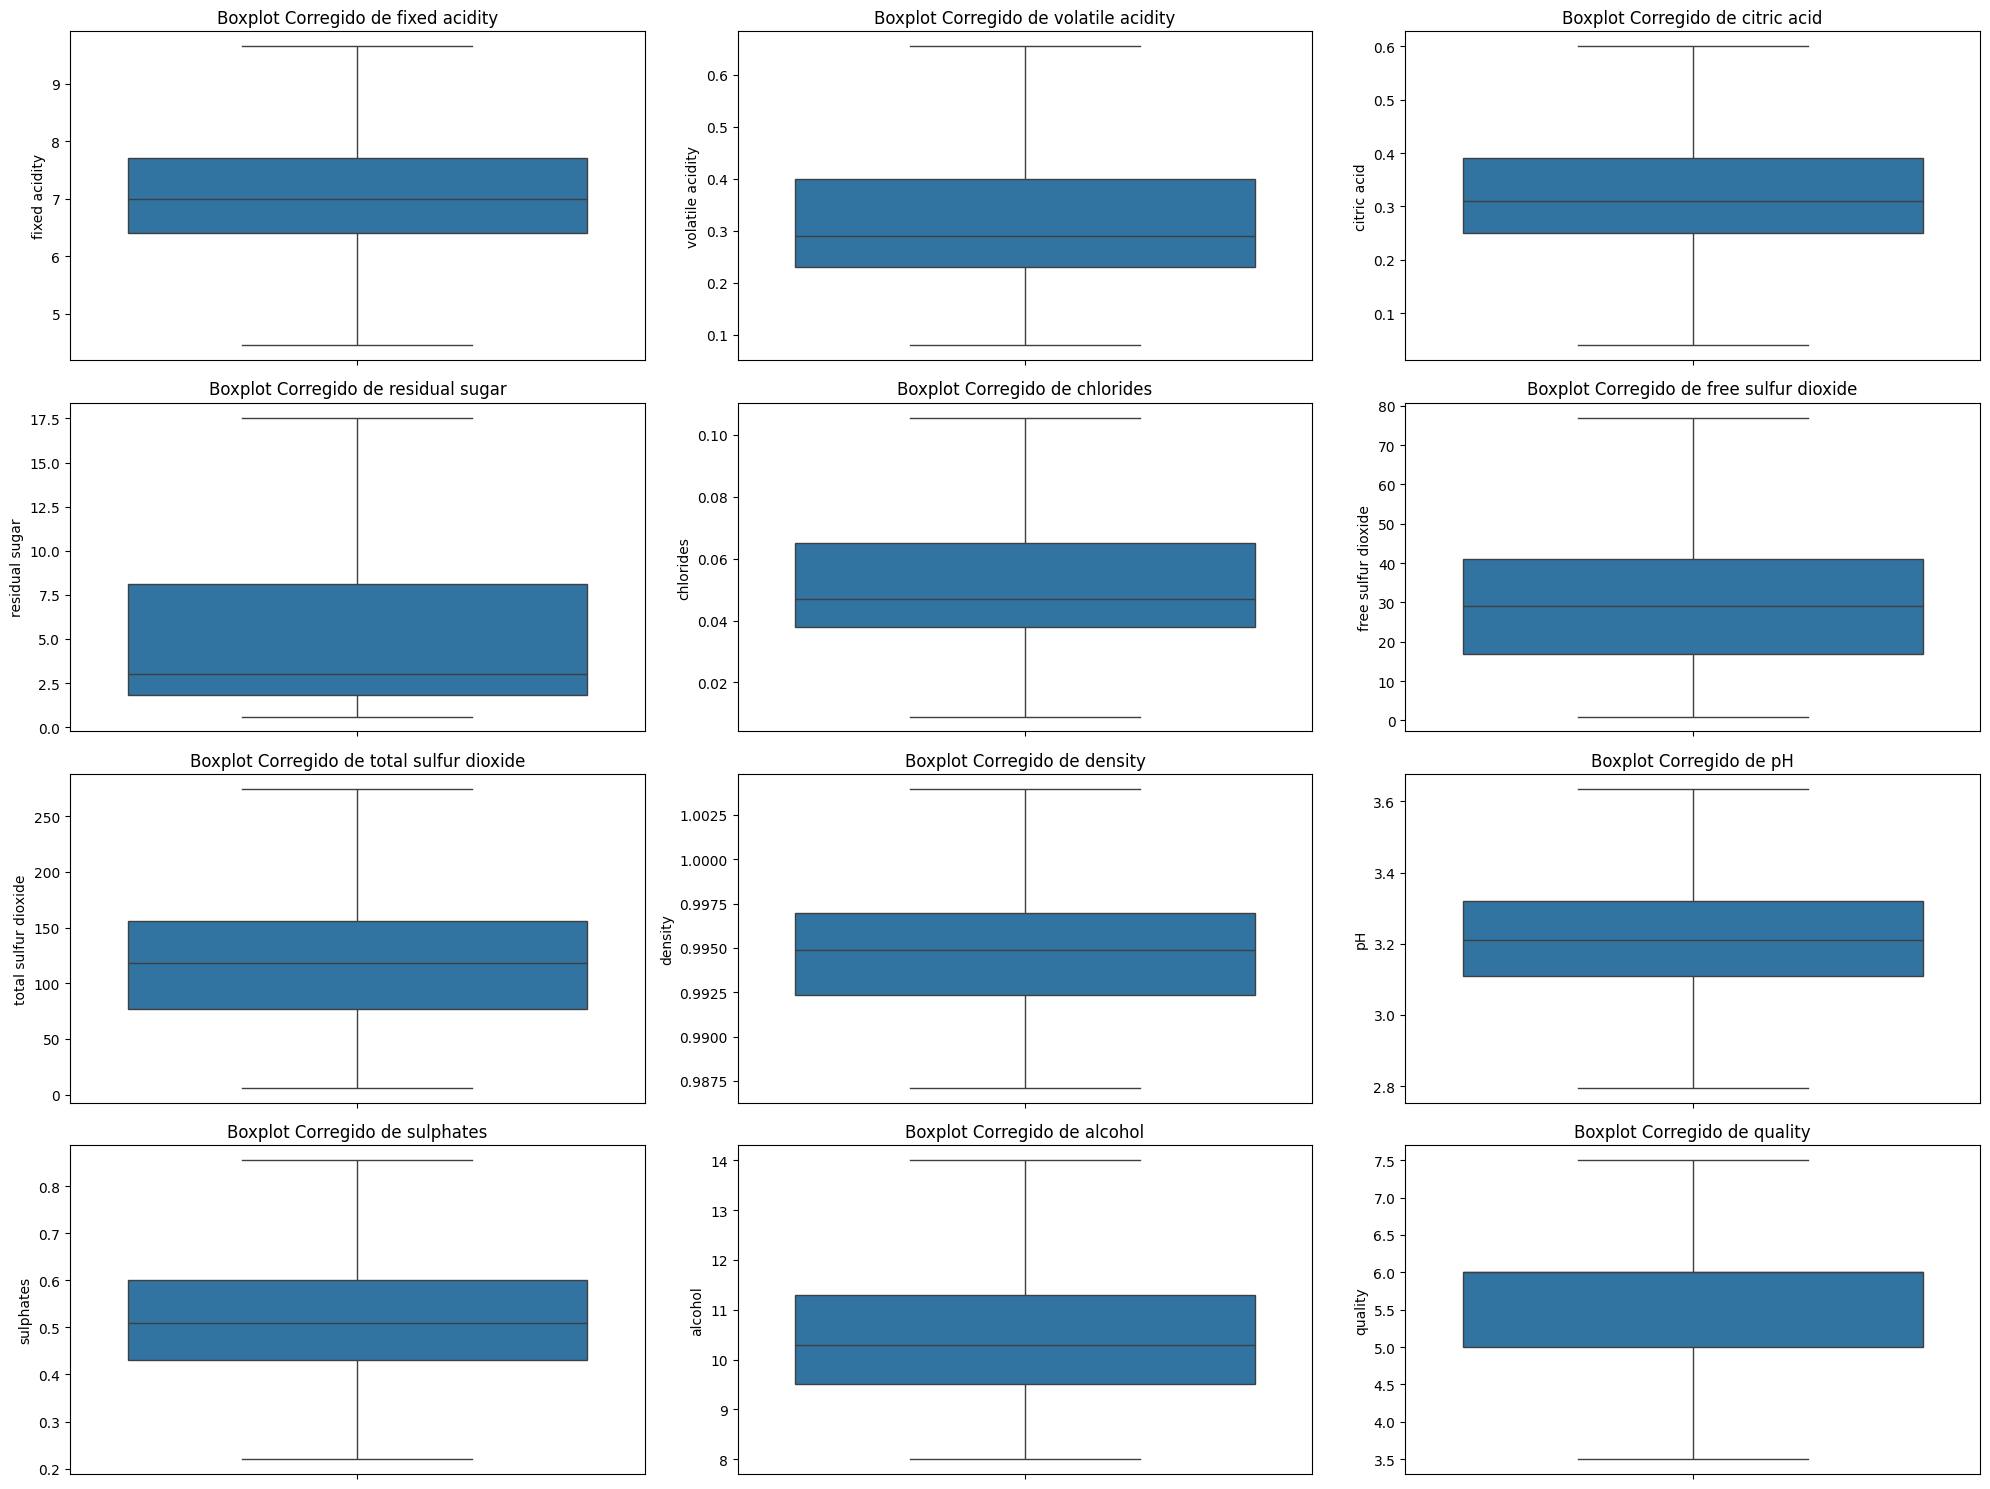

In [ ]:

# 4.1. Aplicación del Método del Rango Intercuartílico (IQR)
print("\nAplicando el método IQR para corregir valores anómalos...")
# Copia del dataset original para corregir los outliers
data_corrected = data.copy()

for column in numerical_columns:
    lb = outlier_info[column]['lower_bound']
    ub = outlier_info[column]['upper_bound']
    data_corrected[column] = np.where(data_corrected[column] < lb, lb, data_corrected[column])
    data_corrected[column] = np.where(data_corrected[column] > ub, ub, data_corrected[column])

print("Corrección de valores anómalos completada.")

# 4.2. Verificación de la Corrección de Valores Anómalos
print("\nVerificación de la corrección de valores anómalos mediante nuevos boxplots...")
# Crear boxplots para cada variable numérica corregida
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data_corrected[column])
    plt.title(f'Boxplot Corregido de {column}')
plt.tight_layout()
plt.show()

### -------------------------------------------------------------------
### 5. Escalado de Datos
### -------------------------------------------------------------------

In [ ]:


# 5.1. Selección de Columnas para Escalado
print("\nSeleccionando columnas para escalado...")
# Selección de columnas para cada tipo de escalado

minmax_columns = ['residual sugar', 'chlorides']  # Columnas para MinMaxScaler
standard_columns = ['citric acid', 'fixed acidity']  # Columnas para StandardScaler

print("Columnas para MinMaxScaler:", minmax_columns)
print("Columnas para StandardScaler:", standard_columns)

# 5.2. Aplicación de MinMaxScaler
print("\nAplicando MinMaxScaler a las columnas seleccionadas...")
# Inicializar MinMaxScaler
minmax_scaler = MinMaxScaler()

# Aplicar MinMaxScaler a las columnas seleccionadas
data_corrected[minmax_columns] = minmax_scaler.fit_transform(data_corrected[minmax_columns])

print("MinMaxScaler aplicado a las columnas seleccionadas.")

# 5.3. Aplicación de StandardScaler
print("\nAplicando StandardScaler a las columnas seleccionadas...")
# Inicializar StandardScaler
standard_scaler = StandardScaler()

# Aplicar StandardScaler a las columnas seleccionadas
data_corrected[standard_columns] = standard_scaler.fit_transform(data_corrected[standard_columns])

print("StandardScaler aplicado a las columnas seleccionadas.")

# 5.4. Verificación del Escalado Aplicado
print("\nVerificando el escalado aplicado mediante estadísticas descriptivas:")
# Estadísticas descriptivas después del escalado
print(data_corrected[minmax_columns + standard_columns].describe())



Seleccionando columnas para escalado...
Columnas para MinMaxScaler: ['residual sugar', 'chlorides']
Columnas para StandardScaler: ['citric acid', 'fixed acidity']

Aplicando MinMaxScaler a las columnas seleccionadas...
MinMaxScaler aplicado a las columnas seleccionadas.

Aplicando StandardScaler a las columnas seleccionadas...
StandardScaler aplicado a las columnas seleccionadas.

Verificando el escalado aplicado mediante estadísticas descriptivas:
       residual sugar    chlorides   citric acid  fixed acidity
count     6497.000000  6497.000000  6.497000e+03   6.497000e+03
mean         0.283642     0.458340 -2.406024e-16   5.249508e-16
std          0.272195     0.220610  1.000077e+00   1.000077e+00
min          0.000000     0.000000 -2.094714e+00  -2.525495e+00
25%          0.070796     0.300518 -5.019474e-01  -6.962238e-01
50%          0.141593     0.393782 -4.687115e-02  -1.333711e-01
75%          0.442478     0.580311  5.598972e-01   5.232905e-01
max          1.000000     1.000000


Creando histogramas para las variables escaladas...


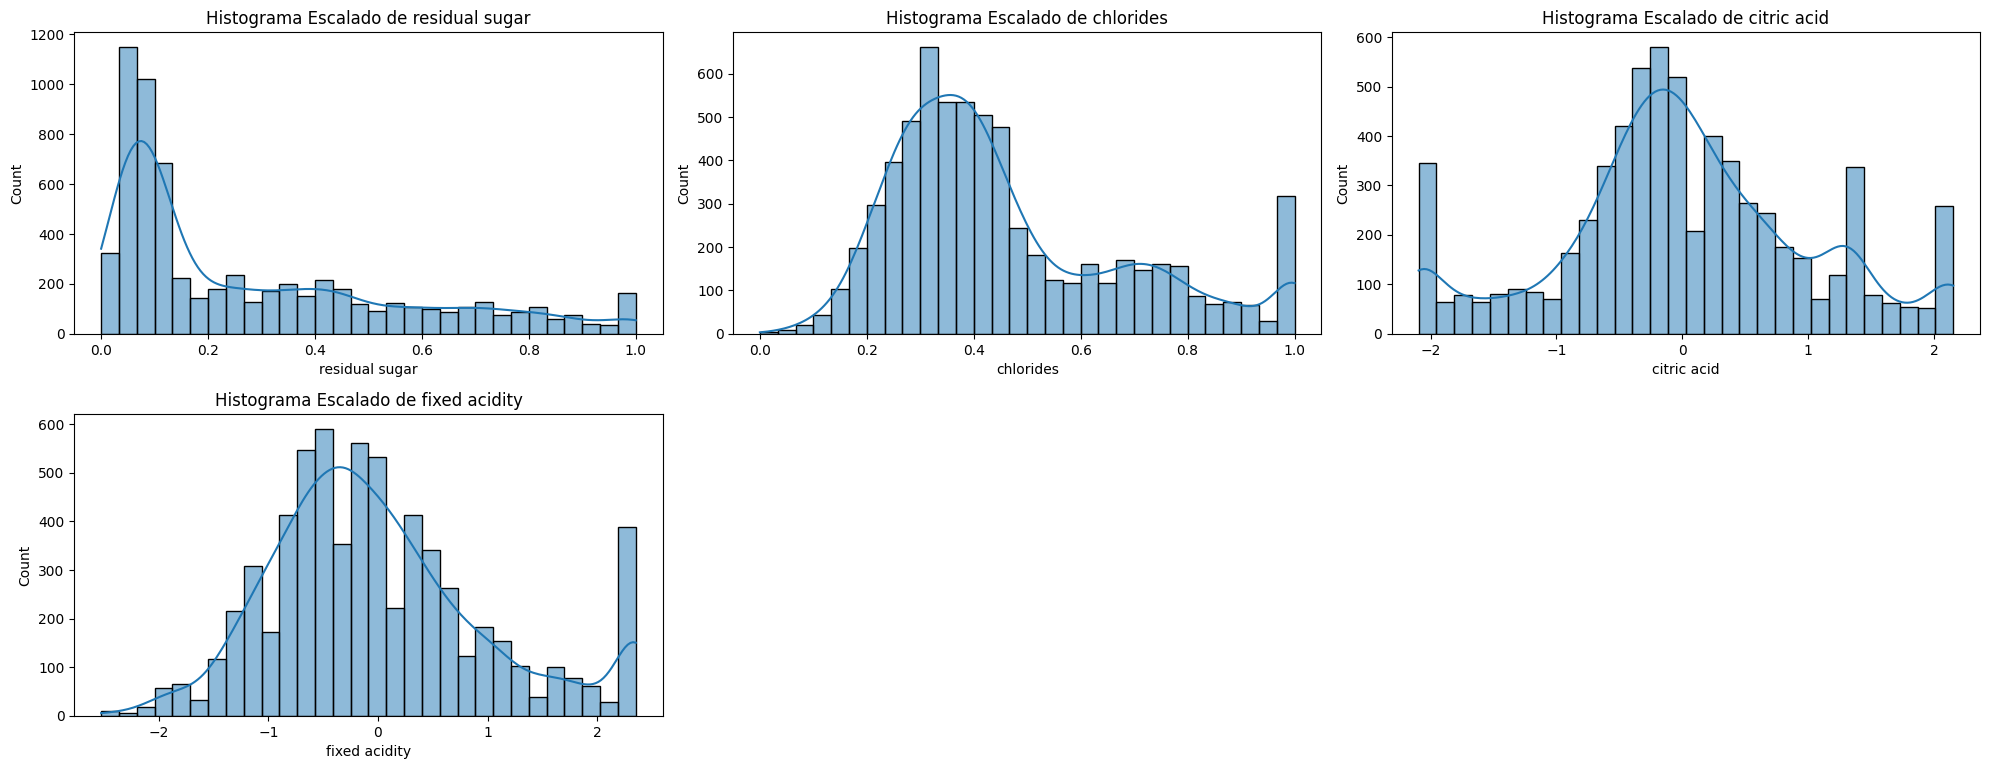


Creando boxplots para las variables escaladas...


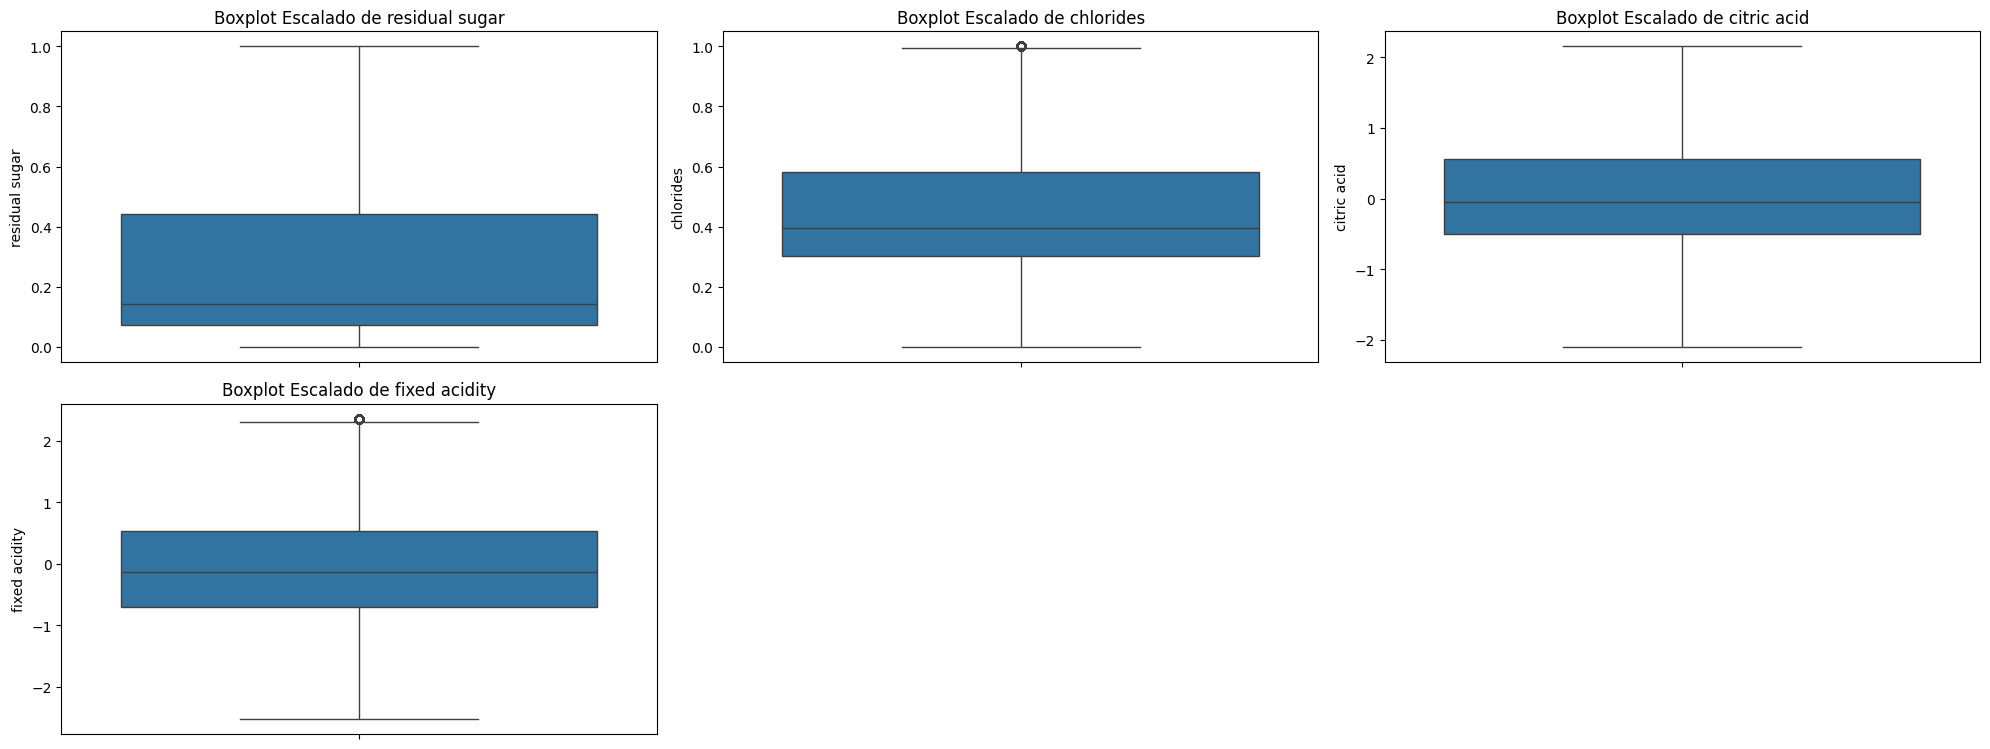

In [9]:
# -------------------------------------------------------------------
# 6. Visualización Final
# -------------------------------------------------------------------

# 6.1. Histogramas de las Variables Escaladas
print("\nCreando histogramas para las variables escaladas...")
# Crear histogramas para las variables escaladas
plt.figure(figsize=(20, 15))
for i, column in enumerate(minmax_columns + standard_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_corrected[column], kde=True, bins=30)
    plt.title(f'Histograma Escalado de {column}')
plt.tight_layout()
plt.show()

# 6.2. Boxplots de las Variables Escaladas
print("\nCreando boxplots para las variables escaladas...")
# Crear boxplots para las variables escaladas
plt.figure(figsize=(20, 15))
for i, column in enumerate(minmax_columns + standard_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data_corrected[column])
    plt.title(f'Boxplot Escalado de {column}')
plt.tight_layout()
plt.show()



# -------------------------------------------------------------------
# 7. Guardar los Datos Escalados
# -------------------------------------------------------------------

In [11]:



# 7.1. Guardar el DataFrame Corregido y Escalado
print("\nGuardando el DataFrame corregido y escalado en 'dataset_scaled.csv'...")
data_corrected.to_csv('dataset_scaled.csv', index=False, sep=';')
print("Datos escalados guardados en 'dataset_scaled.csv'.")



Guardando el DataFrame corregido y escalado en 'dataset_scaled.csv'...
Datos escalados guardados en 'dataset_scaled.csv'.
